### **Sumber Dataset**

[Kaggle: DATASET PREDIC TERKENA PENYAKIT PARU-PARU](https://www.kaggle.com/datasets/andot03bsrc/dataset-predic-terkena-penyakit-paruparu)

In [15]:
import pandas as pd

# Load Dataset from CSV 
data = pd.read_csv("dataset_risiko_penyakit_paru_paru.csv")

data.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Tidak,Tidak,Ya,Ya,Ya,Ya,Tidak,Ya
1,2,Tua,Pria,Ya,Tidak,Ya,Ya,Tidak,Ya,Ya,Tidak
2,3,Muda,Pria,Ya,Tidak,Ya,Ya,Tidak,Ya,Tidak,Tidak
3,4,Tua,Pria,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Tidak
4,5,Muda,Wanita,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ya,Ya


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encoding Data Kategori Menjadi Numerik

encoder = LabelEncoder()

for col in ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 
            'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 
            'Asuransi', 'Penyakit_Bawaan', 'Hasil']:
    data[col] = encoder.fit_transform(data[col])

data.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,1,0,0,0,1,1,1,1,0,1
1,2,1,0,1,0,1,1,0,1,1,0
2,3,0,0,1,0,1,1,0,1,0,0
3,4,1,0,1,1,0,0,0,1,1,0
4,5,0,1,0,1,0,0,1,0,1,1


In [17]:
from sklearn.model_selection import train_test_split

# Split Data Training dan Testing

X = data.drop(['No', 'Hasil'], axis=1)
y = data['Hasil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Scaling (untuk Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas Risiko

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.9463333333333334
ROC-AUC: 0.9927351030617075
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3157
           1       1.00      0.89      0.94      2843

    accuracy                           0.95      6000
   macro avg       0.95      0.94      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [19]:
# Prediksi Risiko Individu

# Contoh Data Baru
new_data = pd.DataFrame([
    [1, 0, 1, 0, 1, 1, 1, 0, 1],  # Tua, Laki-laki, Merokok, Tidak Bekerja, Rumah Tangga, Begadang, Olahraga, Tidak Ada Asuransi, Ada Penyakit Bawaan
    [0, 1, 0, 1, 0, 0, 0, 0, 0],  # Muda, Perempuan, Tidak Merokok, Bekerja, Tidak Rumah Tangga, Tidak Begadang, Tidak Olahraga, Tidak Ada Asuransi, Tidak Ada Penyakit Bawaan
    [0, 0, 0, 0, 1, 0, 1, 1, 0],  # Muda, Laki-laki, Tidak Merokok, Tidak Bekerja, Rumah Tangga, Tidak Begadang, Olahraga, Ada Asuransi, Tidak Ada Penyakit Bawaan
    [1, 1, 0, 1, 0, 1, 0, 1, 1]  # Tua, Perempuan, Tidak Merokok, Bekerja, Tidak Rumah Tangga, Begadang, Tidak Olahraga, Ada Asuransi, Ada Penyakit Bawaan
  ],
  columns=X.columns)

new_data_scaled = scaler.transform(new_data)
predicted_risk = model.predict_proba(new_data_scaled)[:, 1]
print("Probabilitas Risiko:", [f"{risk:.2f}" for risk in predicted_risk])

Probabilitas Risiko: ['0.00', '0.03', '0.47', '1.00']


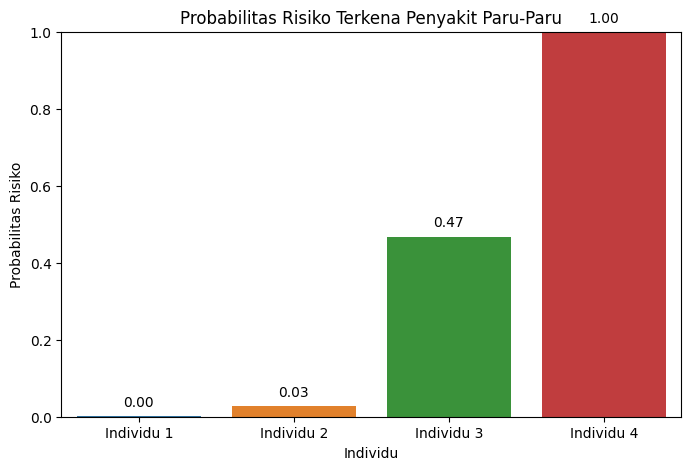

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

# Visualisasi probabilitas risiko

plt.figure(figsize=(8, 5))

ax = sns.barplot(x=[f'Individu {i+1}' for i in range(len(predicted_risk))],
            y=predicted_risk, hue=[f'Individu {i+1}' for i in range(len(predicted_risk))],
            dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Probabilitas Risiko Terkena Penyakit Paru-Paru')
plt.ylabel('Probabilitas Risiko')
plt.xlabel('Individu')
plt.ylim(0, 1)
plt.show()

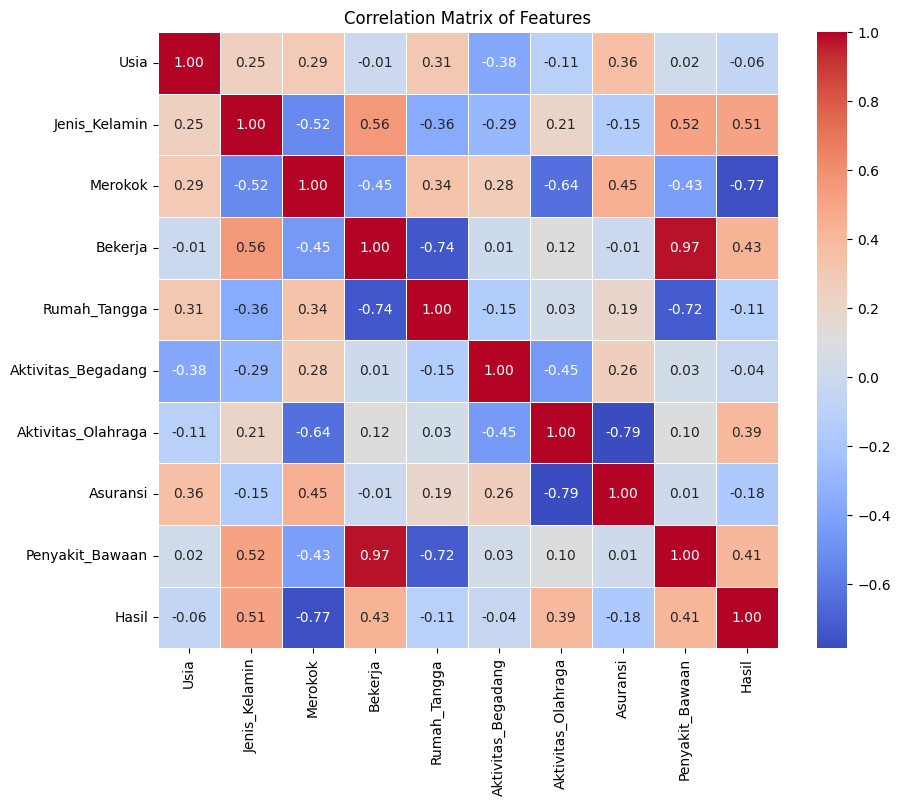

In [24]:
# Compute the correlation matrix
correlation_matrix = data.drop(['No'], axis=1).corr()  # Exclude 'No' column as it is not relevant

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# **Kesimpulan**

**Individu 1**

Probabilitas risiko sebesar 0.00 menunjukkan bahwa individu ini tidak memiliki faktor risiko signifikan dalam data yang dianalisis. Faktor seperti tidak merokok, memiliki asuransi, atau melakukan aktivitas olahraga dapat menjadi alasan mengapa individu ini memiliki risiko nol.

**Individu 2**

Probabilitas risiko sebesar 0.03 menunjukkan bahwa risiko individu ini sangat rendah. Faktor seperti tidak merokok, usia muda, serta tidak memiliki penyakit bawaan menjadi alasan kuat di balik rendahnya risiko individu ini terkena penyakit paru-paru.

**Individu 3**

Probabilitas risiko sebesar 0.47 menunjukkan bahwa individu ini memiliki risiko moderate (sedang) terkena penyakit paru-paru. Faktor yang berkontribusi terhadap risiko ini bisa berupa kombinasi aktivitas begadang, tidak memiliki asuransi, dan tidak adanya aktivitas olahraga. Meski ada beberapa faktor positif seperti usia muda, kombinasi faktor negatif ini cukup meningkatkan probabilitas risiko.

**Individu 4**

Probabilitas risiko sebesar 1.00 menunjukkan bahwa individu ini berada pada risiko maksimal. Individu ini memiliki kombinasi beberapa faktor risiko yang paling signifikan, seperti: usia tua, memiliki penyakit bawaan, tidak melakukan aktivitas olahraga, kebiasaan begadang, dan tidak memiliki asuransi.

## **Kesimpulan Umum**
Secara keseluruhan, hasil ini menunjukkan bahwa individu dengan lebih banyak faktor risiko (seperti kebiasaan merokok, penyakit bawaan, dan kurang aktivitas fisik) memiliki probabilitas lebih tinggi untuk terkena penyakit paru-paru. Sedangkan, individu yang memiliki pola hidup sehat dan faktor perlindungan (seperti olahraga dan asuransi) memiliki risiko jauh lebih rendah.

**Korelasi dengan Variabel Target (Hasil)**

- **Merokok (-0.77)**: Nilai korelasi negatif yang kuat menunjukkan bahwa kebiasaan merokok sangat terkait dengan peningkatan risiko penyakit paru-paru. Hal ini berarti semakin tinggi angka pada variabel 'merokok,' semakin rendah nilai 'Hasil' (yang di-encode sebagai risiko terkena penyakit paru-paru).
- **Penyakit Bawaan (0.41)**: Hubungan positif ini menunjukkan bahwa individu yang memiliki penyakit bawaan cenderung memiliki risiko lebih tinggi terkena penyakit paru-paru.
- **Aktivitas Olahraga (0.39)**: Korelasi positif ini menunjukkan bahwa individu yang berolahraga cenderung memiliki risiko lebih rendah untuk terkena penyakit paru-paru. Ini sejalan dengan penelitian medis yang menunjukkan olahraga dapat meningkatkan fungsi paru-paru.

**Korelasi Antar Fitur Lainnya**

- **Merokok dan Aktivitas Olahraga (-0.64)**: Nilai korelasi negatif ini menunjukkan bahwa individu yang merokok cenderung jarang atau tidak melakukan olahraga. Hal ini menunjukkan pola perilaku negatif yang saling memperburuk risiko kesehatan.
- **Jenis Kelamin dan Bekerja (0.56)**: Korelasi positif ini menunjukkan ada kecenderungan jenis kelamin tertentu (misalnya pria) lebih banyak terlibat dalam aktivitas pekerjaan dibandingkan jenis kelamin lainnya.
- **Penyakit Bawaan dan Bekerja (0.97)**: Hubungan ini cukup mengejutkan karena menunjukkan individu dengan penyakit bawaan cenderung tetap bekerja. Penjelasan lebih lanjut mungkin diperlukan untuk memahami konteks ini, seperti jenis pekerjaan atau sistem asuransi kesehatan mereka.

**Implikasi Korelasi**

Matriks korelasi ini memberikan wawasan mendalam tentang pola-pola yang relevan di antara faktor risiko. Beberapa pola penting yang dapat diambil:
- Kebiasaan buruk (seperti merokok dan begadang) cenderung saling mendukung dalam meningkatkan risiko kesehatan.
- Aktivitas olahraga memiliki hubungan negatif dengan kebiasaan merokok dan risiko penyakit paru-paru, menunjukkan bahwa pola hidup sehat memiliki efek perlindungan.
- Faktor seperti penyakit bawaan dan tidak adanya asuransi dapat memperparah risiko kesehatan secara signifikan.

Korelasi-korelasi ini dapat digunakan untuk merancang langkah-langkah intervensi kesehatan yang lebih spesifik, seperti mengedukasi masyarakat tentang risiko merokok atau meningkatkan akses ke asuransi kesehatan.
